# STEP 1:IMPORT THE LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# STEP 2:READ DATA FROM CSV FILES

In [8]:
df1 = pd.read_csv('mental-and-substance-use-as-share-of-disease.csv')
df2 = pd.read_csv('prevalence-by-mental-and-substance-use-disorder.csv')

# STEP 3: FILL MISSING VALUES IN NUMERIC COLUMNS OF DATAFRAMES df1 AND df2 WITH THE MEAN OF THEIR RESPECTIVE COLUMNS

In [9]:
numeric_columns = df1.select_dtypes(include=[np.number]).columns
df1[numeric_columns] = df1[numeric_columns].fillna(df1[numeric_columns].mean())

numeric_columns = df2.select_dtypes(include=[np.number]).columns
df2[numeric_columns] = df2[numeric_columns].fillna(df2[numeric_columns].mean())


# STEP4: CONVERT DATA TYPES

In [10]:
df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'] = df1['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'].astype(float)
df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Eating disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)
df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'] = df2['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].astype(float)
df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'] = df2['Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)'].astype(float)

# STEP 5: MERGE TWO DATAFRAMES

In [11]:
merged_df = pd.merge(df1,df2,on=['Entity','Code','Year'])

In [12]:
df1.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)
0,Afghanistan,AFG,1990,1.70
1,Afghanistan,AFG,1991,1.73
2,Afghanistan,AFG,1992,1.79
3,Afghanistan,AFG,1993,1.78
4,Afghanistan,AFG,1994,1.71


In [13]:
df2.head()

,Entity,Code,Year,Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


In [14]:
merged_df.head()

,Entity,Code,Year,DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent),Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized,Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized,Eating disorders (share of population) - Sex: Both - Age: Age-standardized,Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent),Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)
0,Afghanistan,AFG,1990,1.70,0.223206,0.703023,0.127700,4.713314,0.45,4.996118,0.44
1,Afghanistan,AFG,1991,1.73,0.222454,0.702069,0.123256,4.702100,0.45,4.989290,0.44
2,Afghanistan,AFG,1992,1.79,0.221751,0.700792,0.118844,4.683743,0.44,4.981346,0.45
3,Afghanistan,AFG,1993,1.78,0.220987,0.700087,0.115089,4.673549,0.44,4.976958,0.45
4,Afghanistan,AFG,1994,1.71,0.220183,0.699898,0.111815,4.670810,0.43,4.977782,0.45


# STEP6: FEATURE MATRIX X AND VARIABLE y

In [17]:
X = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)']]

y = merged_df['DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)']

# STEP7: SPLIT DATA IN TRAINING AND TESTING SETS

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42)

# STEP8: VISUALISING THE CORRELATION HEATMAP OF DISEASES AND MENTAL FITNESS

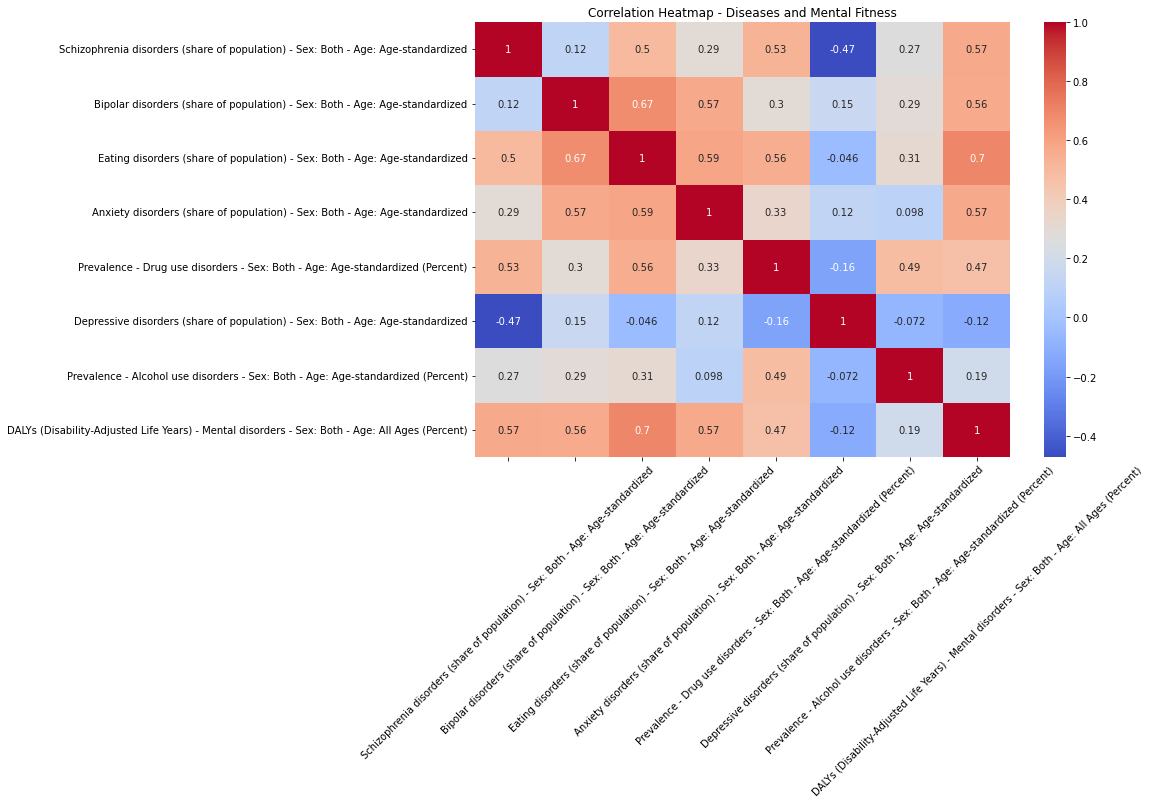

In [19]:
#compute correlelation matrix
corr_matrix = merged_df[['Schizophrenia disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Bipolar disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Eating disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Anxiety disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Drug use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
               'Prevalence - Alcohol use disorders - Sex: Both - Age: Age-standardized (Percent)',
               'DALYs (Disability-Adjusted Life Years) - Mental disorders - Sex: Both - Age: All Ages (Percent)'
                        ]].corr()
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap - Diseases and Mental Fitness')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


# STEP9: FIT THE LINEAR REGRESSION MODEL

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

# STEP10: MAKE A PREDICTION USING TRAINED MODEL

In [21]:
y_pred = model.predict(X_test)

# STEP11: PRINTING MODEL PERFORMANCE METRICS 

In [23]:
# Create a dictionary to store the model performance
model_performance = {}

# Polynomial Regression
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)
X_test_poly = poly_features.transform(X_test)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
poly_r2 = r2_score(y_test, poly_y_pred)
model_performance['1. Polynomial Regression'] = {'MSE': poly_mse, 'R-squared': poly_r2}

# Decision Tree Regression
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)
tree_y_pred = tree_model.predict(X_test)
tree_mse = mean_squared_error(y_test, tree_y_pred)
tree_r2 = r2_score(y_test, tree_y_pred)
model_performance['2. Decision Tree Regression'] = {'MSE': tree_mse, 'R-squared': tree_r2}

# Random Forest Regression
forest_model = RandomForestRegressor()
forest_model.fit(X_train, y_train)
forest_y_pred = forest_model.predict(X_test)
forest_mse = mean_squared_error(y_test, forest_y_pred)
forest_r2 = r2_score(y_test, forest_y_pred)
model_performance['3. Random Forest Regression'] = {'MSE': forest_mse, 'R-squared': forest_r2}

#print model performance
for model, performance in model_performance.items():
    print(f"Model: {model}")
    print("   Mean Squared Error (MSE):", performance['MSE'])
    print("   R-squared Score:", performance['R-squared'])
    print()


Model: 1. Polynomial Regression
   Mean Squared Error (MSE): 1.1568022548912569
   R-squared Score: 0.7735392101864396

Model: 2. Decision Tree Regression
   Mean Squared Error (MSE): 0.20517656672352177
   R-squared Score: 0.9598337164757591

Model: 3. Random Forest Regression
   Mean Squared Error (MSE): 0.07314058399405059
   R-squared Score: 0.9856816717388965



# STEP 12: PLOTTING PREDICTED VS ACTUAL VALUES GRAPH

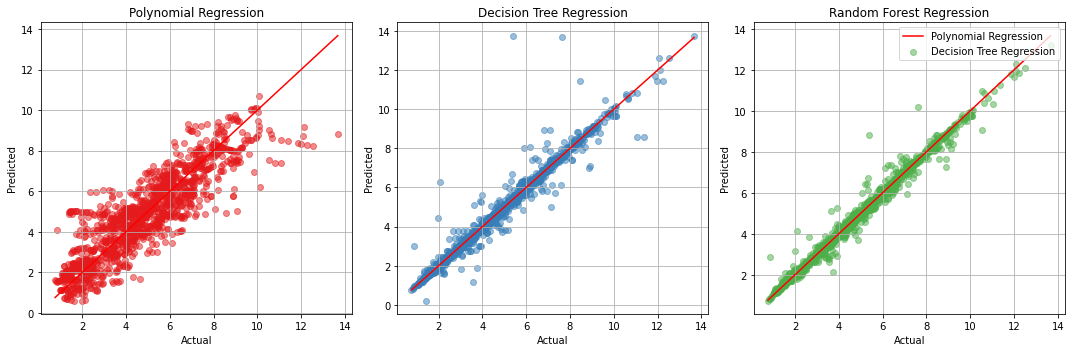

In [35]:
#Create a dictionary to store the model performance
model_performance = {
        'Polynomial Regression': {'Predicted': poly_y_pred, 'Actual': y_test},
    'Decision Tree Regression': {'Predicted': tree_y_pred, 'Actual': y_test},
    'Random Forest Regression': {'Predicted': forest_y_pred, 'Actual': y_test},
    }

# Set up figure and axes
num_models = len(model_performance)
num_rows = (num_models // 3) + (1 if num_models % 3 != 0 else 0)
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))

# Define color palette
color_palette = plt.cm.Set1(range(num_models))

# Iterate over the models and plot the predicted vs actual values
for i, (model, performance) in enumerate(model_performance.items()):
    row = i // 3
    col = i % 3
    ax = axes[row, col] if num_rows > 1 else axes[col]

    # Get the predicted and actual values
    y_pred = performance['Predicted']
    y_actual = performance['Actual']

    # Scatter plot of predicted vs actual values
    ax.scatter(y_actual, y_pred, color=color_palette[i], alpha=0.5, marker='o')

    # Add a diagonal line for reference
    ax.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='r')

    # Set the title and labels
    ax.set_title(model)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')

    # Add gridlines
    ax.grid(True)

# Adjust spacing between subplots
fig.tight_layout()

# Create a legend
plt.legend(model_performance.keys(), loc='upper right')

# Show the plot
plt.show()

# PRINTS REGRESSION MODEL IN ORDER OF PRECISION AND ALSO TELLING WHICH MODEL IS BEST 

In [32]:
# Store the regression models and their scores in a dictionary
regression_scores = {
        "Polynomial Regression": (poly_mse, poly_r2),
    "Random Forest Regression": (forest_mse, forest_r2),
    "Decision Tree Regression": (tree_mse, tree_r2),
    }

# Sort the regression models based on MSE in ascending order and R-squared score in descending order
sorted_models = sorted(regression_scores.items(), key=lambda x: (x[1][0], -x[1][1]))

print("Regression Models in Order of Precision:")
for i, (model, scores) in enumerate(sorted_models, start=1):
    print(f"{i}. {model}")
    print("   Mean Squared Error (MSE):", scores[0])
    print("   R-squared Score:", scores[1])
    print()

most_precise_model = sorted_models[0][0]
least_precise_model = sorted_models[-1][0]

print(f"The most precise model is: {most_precise_model}")
print(f"The least precise model is: {least_precise_model}")


Regression Models in Order of Precision:
1. Random Forest Regression
   Mean Squared Error (MSE): 0.07314058399405059
   R-squared Score: 0.9856816717388965

2. Decision Tree Regression
   Mean Squared Error (MSE): 0.20517656672352177
   R-squared Score: 0.9598337164757591

3. Polynomial Regression
   Mean Squared Error (MSE): 1.1568022548912569
   R-squared Score: 0.7735392101864396

The most precise model is: Random Forest Regression
The least precise model is: Polynomial Regression
